# Pymaceuticals Inc.
---

### Analysis

- The drug regimens tested include Capomulin, Ramicane, Ketapril, Naftisol, Zoniferol, Stelasyn, Infubinol, Ceftamin, Propriva, and a Placebo. Among the tested drugs, Capomulin and Ramicane emerged as the most effective in reducing tumor volume.For Capomulin, the mean tumor volume following the full course of treatment was 40.68 mm³, Ramicane showed a mean tumor volume of 40.21 mm³, and the overall mean tumor volume for the entire group was 50.97 mm³. According to this data, Capomulin exhibited approximately a 20% greater reduction in mean tumor volume compared to the group average. A closer examination of Capomulin's efficacy revealed significant decreases in tumor volume on days 20 and 30. Capomulin, in particular, demonstrated remarkable effectiveness, with a notable decrease in tumor volume for a specific mouse during the course of treatment.


 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "/Users/matthewflanagan/Desktop/Data Analytics Work/Module 5/HW/Starter_Code 2/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "/Users/matthewflanagan/Desktop/Data Analytics Work/Module 5/HW/Starter_Code 2/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



#Combine the data into a single DataFrame
mouse_and_studyResults_df = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

# Display the data table for preview

mouse_and_studyResults_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
number_of_mice = len(mouse_and_studyResults_df['Mouse ID'].unique())

number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_and_studyResults_df[mouse_and_studyResults_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice_data = mouse_and_studyResults_df[mouse_and_studyResults_df['Mouse ID'] == 'g989']

duplicated_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_duplicate_mice = mouse_and_studyResults_df[~mouse_and_studyResults_df['Mouse ID'].isin(duplicate_mice)]
cleaned_duplicate_mice.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_number_of_mice = len(cleaned_duplicate_mice['Mouse ID'].unique())

cleaned_number_of_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


drug_regimen_grouped = cleaned_duplicate_mice.groupby('Drug Regimen')

mean_tumor_byDrug = drug_regimen_grouped['Tumor Volume (mm3)'].mean()

median_tumor_byDrug = drug_regimen_grouped['Tumor Volume (mm3)'].median()

variance_tumor_byDrug = drug_regimen_grouped['Tumor Volume (mm3)'].var()

stdDev_tumor_byDrug = drug_regimen_grouped['Tumor Volume (mm3)'].std()

sem_tumor_byDrug = drug_regimen_grouped['Tumor Volume (mm3)'].sem()

summary_stats_df = pd.DataFrame({

    'Mean Tumor Volume': mean_tumor_byDrug,
    'Median Tumor Volume': median_tumor_byDrug,
    'Variance Tumor Volume': variance_tumor_byDrug,
    'Std Dev Tumor Volume': stdDev_tumor_byDrug,
    'SEM Tumor Volume': sem_tumor_byDrug
}).reset_index()

summary_stats_df

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Std Dev Tumor Volume,SEM Tumor Volume
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

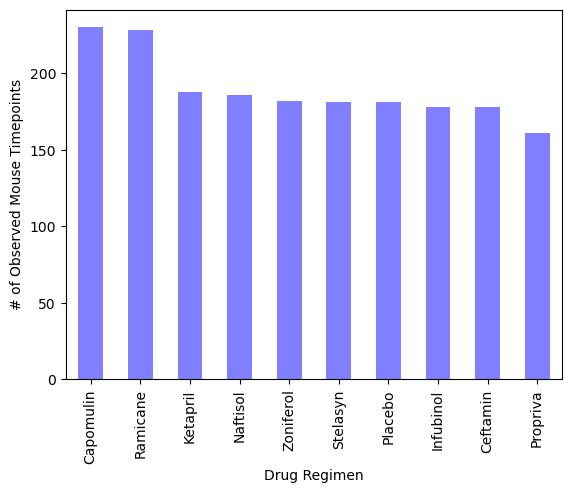

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts_pd = mouse_and_studyResults_df['Drug Regimen'].value_counts()

pd_graph = drug_regimen_counts_pd.plot(kind='bar', color='b', alpha=0.5)

pd_graph.set_xlabel('Drug Regimen')
pd_graph.set_ylabel('# of Observed Mouse Timepoints')
pd_graph.set_xticklabels(pd_graph.get_xticklabels(), rotation="vertical")

plt.show()

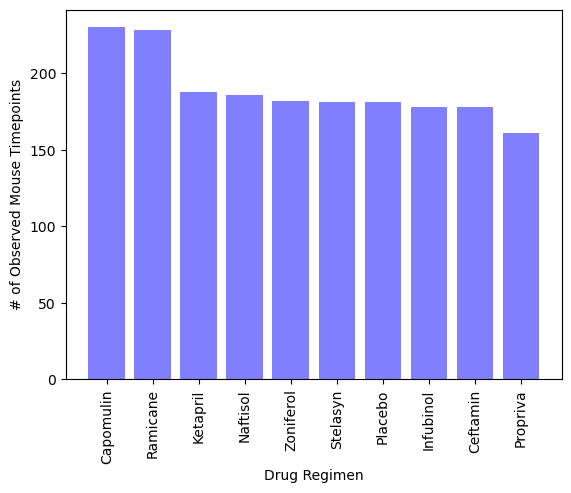

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts = mouse_and_studyResults_df['Drug Regimen'].value_counts()

y_axis = drug_regimen_counts.values
x_axis = drug_regimen_counts.index

plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()

<Axes: ylabel='Sex'>

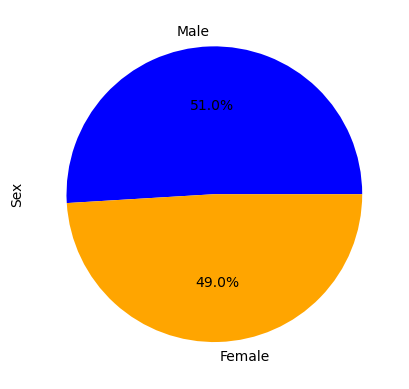

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_vs_female_pd = cleaned_duplicate_mice['Sex'].value_counts()

pd_pie = male_vs_female_pd.plot(kind='pie', colors=['b','orange'], autopct="%1.1f%%")
pd_pie.set_ylabel('Sex')

pd_pie


<function matplotlib.pyplot.show(close=None, block=None)>

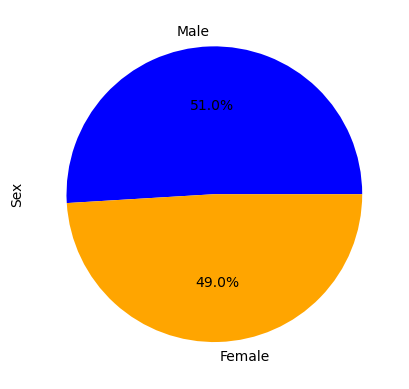

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

male_vs_female_plt = cleaned_duplicate_mice['Sex'].value_counts()


plt.pie(male_vs_female_plt, labels=("Male", "Female"), colors=("Blue", "Orange"), autopct="%1.1f%%")

plt.ylabel("Sex")

plt.show


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = cleaned_duplicate_mice.groupby('Mouse ID')['Timepoint'].max()

last_timepoint_df = pd.DataFrame(last_timepoint).reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

tumorVol_last_timepoint = pd.merge(last_timepoint_df, cleaned_duplicate_mice, on=['Mouse ID', 'Timepoint'], how='left')

regimens_of_interest = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

final_tumor_vol_df = tumorVol_last_timepoint[tumorVol_last_timepoint['Drug Regimen'].isin(regimens_of_interest)]

final_tumor_vol_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    mice_on_each_drug = final_tumor_vol_df[final_tumor_vol_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # add subset 
    tumor_volume_data.append(mice_on_each_drug)
    
    # Determine outliers using upper and lower bounds
    quartiles = mice_on_each_drug.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q =quartiles[0.75]
    iqr = upper_q - lower_q

    #outliers
    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q + (1.5 * iqr)

    outliers = mice_on_each_drug[(mice_on_each_drug < lower_bound) | (mice_on_each_drug > upper_bound)]

    print(f"{treatment}'s potential outliers are: {outliers}")





Capomulin's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


<function matplotlib.pyplot.show(close=None, block=None)>

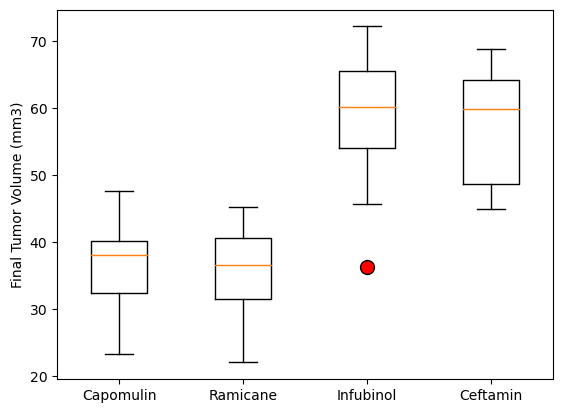

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume_data, labels=treatments, flierprops=dict(markerfacecolor='red', marker='o', markersize=10))

plt.ylabel('Final Tumor Volume (mm3)')

plt.show

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

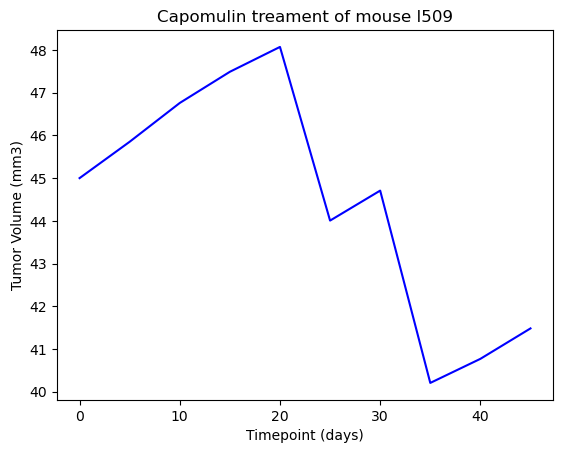

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_plot_mouse = 'l509'

capomulin_mouse_data = cleaned_duplicate_mice[(cleaned_duplicate_mice['Mouse ID'] == line_plot_mouse) & 
                                              (cleaned_duplicate_mice['Drug Regimen'] == 'Capomulin')]

plt.plot(capomulin_mouse_data['Timepoint'], capomulin_mouse_data['Tumor Volume (mm3)'], marker=' ', color='b')

plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capomulin treament of mouse {line_plot_mouse}")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

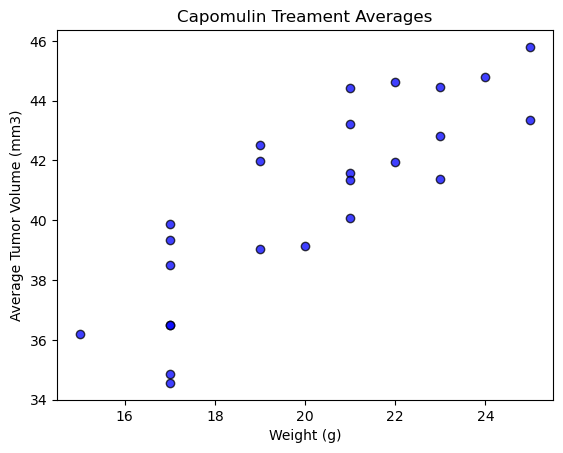

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
all_capomulin_data = cleaned_duplicate_mice[cleaned_duplicate_mice['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID')

capomulin_avg_tumor_vol = all_capomulin_data['Tumor Volume (mm3)'].mean()
capomulin_avg_mouse_wt = all_capomulin_data['Weight (g)'].mean()


plt.scatter(capomulin_avg_mouse_wt, capomulin_avg_tumor_vol, marker='o', facecolors='blue', edgecolors='black', alpha=0.75)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin Treament Averages")

plt.show


## Correlation and Regression

<function matplotlib.pyplot.show(close=None, block=None)>

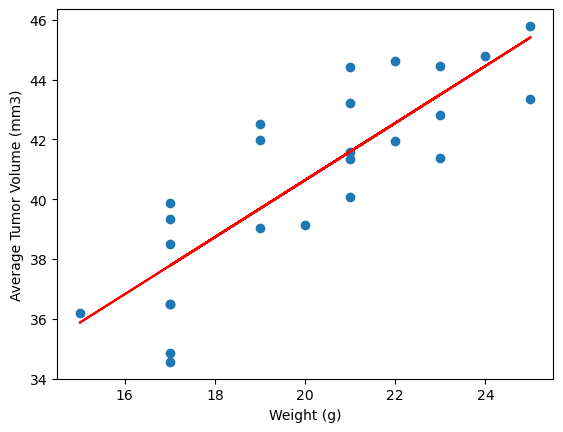

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(capomulin_avg_mouse_wt, capomulin_avg_tumor_vol)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_avg_mouse_wt, capomulin_avg_tumor_vol)

regress_value = (capomulin_avg_mouse_wt * slope) + intercept

plt.scatter(capomulin_avg_mouse_wt, capomulin_avg_tumor_vol)
plt.plot(capomulin_avg_mouse_wt, regress_value, color='r')

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show
